# Assignment 1

### Question 1: Homework incentives

Recall the student's problem from the first lecture. We are examining the dynamic incentives that affect a student's choices to submit homework assignments. In every period $t=1,\ldots,\check{t}$, the student decides whether to submit an assignment or not. For your convenience, we first copy the code from the lecture's example. 

In [89]:
nAss = 11;
k = 3;
gradeScheme=@(hwGrade,assPassed,finGrade)(0.25*hwGrade*(assPassed>nAss-k)+0.75*finGrade); % Harsh
% gradeScheme=@(hwGrade,assPassed,finGrade)(0.4*hwGrade*assPassed/nAss+0.6*finGrade); % Smooth
effortCost = ones(1,nAss)*0.3;
successPr = 0.4;
hwGrade = 10;
finGradePr = [0 0.05 0.05 0.1 0.15 0.15 0.2 0.15 0.10 0.05 0];
u=@(grade)(grade-10*(grade<5.25));
rho = 0.9;

In [90]:
% Initialization
v=nan(nAss+1,nAss+1); UWork=nan(nAss,nAss); UShirk=UWork; work=UWork;
assPassed = ones(11,1)*(0:nAss);
finGrade = (0:10)'*ones(1,nAss+1);
v(nAss+1,:) = finGradePr*u(gradeScheme(hwGrade, assPassed, finGrade));


In [91]:
% Solve by Backward Recursion
for ass=nAss:-1:1
    UShirk(ass,1:ass) = rho*v(ass+1,1:ass);
    UWork(ass,1:ass) = successPr*rho*v(ass+1,2:ass+1)+(1-successPr)*UShirk(ass,1:ass)-effortCost(ass);
    work(ass,1:ass)=UWork(ass,1:ass)>UShirk(ass,1:ass);
    v(ass,1:ass) = max([UWork(ass,1:ass);UShirk(ass,1:ass)]);
end

Let $v_t(x)$ be the student's expected discounted utility just prior to deciding on assignment $t$ if (s)he has passed $x$ of the previous $t-1$ assignments.

a) **Write the Bellman equations for $v_t$, $1\leq t<\check{t}$, and for $v_\check{t}$ (note that the value for the final assignment needs special attention).**

Utility of a student:
$$U_t(\text{hwGrade, assPassed, finGrade})=-\sum\limits_{t=1}^{11}D_t*\text{effortcost}*\rho^{t-1}+\rho^{11}u(\text{gradescheme(hwGrade, assPassed, finGrade)})$$
In the last period, i.e. t=12
$$v_{12}(\text{hwGrade, assPassed, finGrade}) = u(\text{gradescheme(hwGrade, assPassed, finGrade)})$$
One period backwards,
$$v_{11}(\text{hwGrade, assPassed, finGrade}) = \max\{-\text{effortcost}+\text{successPr}*\rho*v_{12}(\text{hwGrade, assPassed+1, finGrade})+(1-\text{successPr})*\rho*v_{12}(\text{hwGrade, assPassed, finGrade})+\rho*v_{12}(\text{hwGrade, assPassed, finGrade})\}$$

In [118]:
UWork
UShirk
work


UWork =

   -0.4748       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -0.5094   -0.1906       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -0.9044   -0.1973    0.1282       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.6022   -0.6384    0.1537    0.4848       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.7468   -1.7468   -0.3197    0.5474    0.8826       NaN       NaN       NaN       NaN       NaN       NaN
   -1.9076   -1.9076   -1.9076    0.0616    0.9879    1.3248       NaN       NaN       NaN       NaN       NaN
   -2.0862   -2.0862   -2.0862   -2.0862    0.5170    1.4791    1.8146       NaN       NaN       NaN       NaN
   -2.2847   -2.2847   -2.2847   -2.2847   -2.2847    1.0600    2.0251    2.3546       NaN       NaN       NaN
   -2.5052   -2.5052   -2.5052   -2.5052   -2.5052   -2.5052    1.7067    2.6296    2.9475       NaN  

b) **Show that these Bellman equations have a unique solution $v_t$, $1\leq t\leq\check{t}$.**

c) **Show that there exist an optimal strategy for submitting homework assignments that is Markovian. Express this strategy in terms of $v_t$, $1\leq t\leq\check{t}$.**

$\alpha$ = ($\alpha_{1}$,$\alpha_{2}$)\
$v_{t}^\alpha$=$\mathbf{E}$$\sum_${$\vartau=t$}$^{\hat{t}\rho^{\taoA



d) **Using the code above, numerically analyze how the student's optimal strategy changes when the success probability `successPr` changes from below to above its current value of $0.9$, under both grading schemes. Briefly discuss.**

In [99]:
nAss = 11;
k = 3;
gradeScheme=@(hwGrade,assPassed,finGrade)(0.25*hwGrade*(assPassed>nAss-k)+0.75*finGrade); % Harsh
% gradeScheme=@(hwGrade,assPassed,finGrade)(0.4*hwGrade*assPassed/nAss+0.6*finGrade); % Smooth
effortCost = ones(1,nAss)*0.3;
successPr = 0.95;
hwGrade = 10;
finGradePr = [0 0.05 0.05 0.1 0.15 0.15 0.2 0.15 0.10 0.05 0];
u=@(grade)(grade-10*(grade<5.25));
rho = 0.9;

In [100]:
v=nan(nAss+1,nAss+1); UWork=nan(nAss,nAss); UShirk=UWork; work=UWork;
assPassed = ones(11,1)*(0:nAss);
finGrade = (0:10)'*ones(1,nAss+1);
v(nAss+1,:) = finGradePr*u(gradeScheme(hwGrade, assPassed, finGrade));

In [101]:
for ass=nAss:-1:1
    UShirk(ass,1:ass) = rho*v(ass+1,1:ass);
    UWork(ass,1:ass) = successPr*rho*v(ass+1,2:ass+1)+(1-successPr)*UShirk(ass,1:ass)-effortCost(ass);
    work(ass,1:ass)=UWork(ass,1:ass)>UShirk(ass,1:ass);
    v(ass,1:ass) = max([UWork(ass,1:ass);UShirk(ass,1:ass)]);
    
end

In [102]:
UShirk
UWork
work
v


UShirk =

   -0.4585       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -0.8140   -0.1776       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.1719   -0.5746    0.1383       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.3022   -1.3022   -0.2877    0.4927       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.4468   -1.4468   -1.4468    0.0555    0.8891       NaN       NaN       NaN       NaN       NaN       NaN
   -1.6076   -1.6076   -1.6076   -1.6076    0.4653    1.3312       NaN       NaN       NaN       NaN       NaN
   -1.7862   -1.7862   -1.7862   -1.7862   -1.7862    0.9540    1.8226       NaN       NaN       NaN       NaN
   -1.9847   -1.9847   -1.9847   -1.9847   -1.9847   -1.9847    1.5360    2.3666       NaN       NaN       NaN
   -2.2052   -2.2052   -2.2052   -2.2052   -2.2052   -2.2052   -2.2052    2.2283    2.9665       NaN 

When the probability of success is really low, the students prefer to shrink more assignments. However, when the probability of success rise, the probability of work increases nevertherless, they will keep working until a point and after that they relax and stop doing the assignments. 

% finGradePr = [0 0.05 0.05 0.1 0.15 0.15 0.2 0.15 0.10 0.05 0.0];


Instead, we now assume that the student can stochastically improve her or his final grade by passing more assignments. In particular, suppose that each assignment passed takes probability masses 0.01 from each of the final grades 4,5,6, and 7 and adds probability masses 0.04/3 to each of the final grades 8,9, and 10.

e) **Is this modified problem still a nonstationary Markov decision problem? If so, how does the modification change the Bellman equations for $v_t$, $1\leq t<\check{t}$, and for $v_\check{t}$?**

In [ ]:
yes, this modified problem still a nontationary Markov decision problem because it still depends on the time

Utility of a student:
$$U_t(\text{hwGrade, assPassed, finGrade})=-\sum\limits_{t=1}^{11}D_t*\text{effortcost}*\rho^{t-1}+\rho^{11}u(\text{gradescheme(hwGrade, assPassed, finGrade)})$$
In the last period, i.e. t=12
$$v_{12}(\text{hwGrade, assPassed, finGrade}) = finGradePr(assignment)*u(gradeScheme(hwGrade, assPassed, finGrade)$$
One period backwards,
$$v_{11}(\text{hwGrade, assPassed, finGrade}) = \max\{-\text{effortcost}+\text{successPr}*\rho*v_{12}(\text{hwGrade, assPassed+1, finGrade})+(1-\text{successPr})*\rho*v_{12}(\text{hwGrade, assPassed, finGrade})+\rho*finGradePr(assignment)*u(gradeScheme(hwGrade, assPassed, finGrade))\}$$





f) **Adapt the above code to this modified student's problem and solve it numerically. What is the effect on the student's optimal assignment submission choices? In particular, analyze how the student's actions are changed under each grading scheme. Briefly discuss.**


In [147]:
nAss = 11;
k = 3;
probdistribution=[0 0 0 0 0 0 0 0 0 0 0 0; 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05; 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05; 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1;(0.15-0.01*(0)) (0.15-0.01*(1)) (0.15-0.01*(2)) (0.15-0.01*(3)) (0.15-0.01*(4)) (0.15-0.01*(5)) (0.15-0.01*(6)) (0.15-0.01*(7)) (0.15-0.01*(8)) (0.15-0.01*(9)) (0.15-0.01*(10)) (0.15-0.01*(11)); (0.15-0.01*(0)) (0.15-0.01*(1)) (0.15-0.01*(2)) (0.15-0.01*(3)) (0.15-0.01*(4)) (0.15-0.01*(5)) (0.15-0.01*(6)) (0.15-0.01*(7)) (0.15-0.01*(8)) (0.15-0.01*(9)) (0.15-0.01*(10)) (0.15-0.01*(11)); (0.2-0.01*(0)) (0.2-0.01*(1)) (0.2-0.01*(2)) (0.2-0.01*(3)) (0.2-0.01*(4)) (0.2-0.01*(5)) (0.2-0.01*(6)) (0.2-0.01*(7)) (0.2-0.01*(8)) (0.2-0.01*(9)) (0.2-0.01*(10)) (0.2-0.01*(11)); (0.15-0.01*(0)) (0.15-0.01*(1)) (0.15-0.01*(2)) (0.15-0.01*(3)) (0.15-0.01*(4)) (0.15-0.01*(5)) (0.15-0.01*(6)) (0.15-0.01*(7)) (0.15-0.01*(8)) (0.15-0.01*(9)) (0.15-0.01*(10)) (0.15-0.01*(11)); (0.10+((0.04/3)*(0))) (0.10+((0.04/3)*(1))) (0.10+((0.04/3)*(2))) (0.10+((0.04/3)*(3))) (0.10+((0.04/3)*(4))) (0.10+((0.04/3)*(5))) (0.10+((0.04/3)*(6))) (0.10+((0.04/3)*(7))) (0.10+((0.04/3)*(8))) (0.10+((0.04/3)*(9))) (0.10+((0.04/3)*(10))) (0.10+((0.04/3)*(11)));(0.05+((0.04/3)*(0))) (0.05+((0.04/3)*(1))) (0.05+((0.04/3)*(2))) (0.05+((0.04/3)*(3))) (0.05+((0.04/3)*(4))) (0.05+((0.04/3)*(5))) (0.05+((0.04/3)*(6))) (0.05+((0.04/3)*(7))) (0.05+((0.04/3)*(8))) (0.05+((0.04/3)*(9))) (0.05+((0.04/3)*(10))) (0.05+((0.04/3)*(11))); (0.0+((0.04/3)*(0))) (0.0+((0.04/3)*(1))) (0.0+((0.04/3)*(2))) (0.0+((0.04/3)*(3))) (0.0+((0.04/3)*(4))) (0.0+((0.04/3)*(5))) (0.0+((0.04/3)*(6))) (0.0+((0.04/3)*(7))) (0.0+((0.04/3)*(8))) (0.0+((0.04/3)*(9))) (0.0+((0.04/3)*(10))) (0.0+((0.04/3)*(11)))]
B=probdistribution.'
finGradePrnew=[ 0 0.0500 0.0500 0.1000 0.0400 0.0400 0.0900 0.0400 0.2467 0.1967 0.1467]

gradeScheme=@(hwGrade,assPassed,finGrade)(0.25*hwGrade*(assPassed>nAss-k)+0.75*finGrade); % Harsh
% gradeScheme=@(hwGrade,assPassed,finGrade)(0.4*hwGrade*assPassed/nAss+0.6*finGrade); % Smooth
effortCost = ones(1,nAss)*0.3;
successPr = 0.4; 
hwGrade = 10;
u=@(grade)(grade-10*(grade<5.25));
rho = 0.9;
ass


probdistribution =

         0         0         0         0         0         0         0         0         0         0         0         0
    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500
    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500    0.0500
    0.1000    0.1000    0.1000    0.1000    0.1000    0.1000    0.1000    0.1000    0.1000    0.1000    0.1000    0.1000
    0.1500    0.1400    0.1300    0.1200    0.1100    0.1000    0.0900    0.0800    0.0700    0.0600    0.0500    0.0400
    0.1500    0.1400    0.1300    0.1200    0.1100    0.1000    0.0900    0.0800    0.0700    0.0600    0.0500    0.0400
    0.2000    0.1900    0.1800    0.1700    0.1600    0.1500    0.1400    0.1300    0.1200    0.1100    0.1000    0.0900
    0.1500    0.1400    0.1300    0.1200    0.1100    0.1000    0.0900    0.0800    0.0700    0.0600    0.0500    0.0400
    0.1000 

In [120]:
v=nan(nAss+1,nAss+1); UWork=nan(nAss,nAss); UShirk=UWork; work=UWork;
assPassed = ones(11,1)*(0:nAss);
finGrade = (0:10)'*ones(1,nAss+1);
v(nAss+1,:) = finGradePrnew*u(gradeScheme(hwGrade, assPassed, finGrade));

In [121]:
for ass=nAss:-1:1
    UShirk(ass,1:ass) = rho*v(ass+1,1:ass);
    UWork(ass,1:ass) = successPr*rho*v(ass+1,2:ass+1)+(1-successPr)*UShirk(ass,1:ass)-effortCost(ass);
    work(ass,1:ass)=UWork(ass,1:ass)>UShirk(ass,1:ass);
    v(ass,1:ass) = max([UWork(ass,1:ass);UShirk(ass,1:ass)]);
end

In [149]:
UShirk
UWork
work


UShirk =

   -0.9493       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.0548   -1.0548       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.1719   -1.1719   -1.1719       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.3022   -1.3022   -1.3022   -1.3022       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.4468   -1.4468   -1.4468   -1.4468   -1.4468       NaN       NaN       NaN       NaN       NaN       NaN
   -1.6076   -1.6076   -1.6076   -1.6076   -1.6076   -1.6076       NaN       NaN       NaN       NaN       NaN
   -1.7862   -1.7862   -1.7862   -1.7862   -1.7862   -1.7862   -1.6551       NaN       NaN       NaN       NaN
   -1.9847   -1.9847   -1.9847   -1.9847   -1.9847   -1.9847   -1.9847   -0.8706       NaN       NaN       NaN
   -2.2052   -2.2052   -2.2052   -2.2052   -2.2052   -2.2052   -2.2052   -1.6976    0.8782       NaN 

After the change in probability, we can see that students prefer to shrink than work. However, due to the high probability of tasks 8, 9 and 10, in the final grade, we observe that students have greater incentives to work on these assignments.

### Question 2: Terminating a relationship

In the first lecture, we also discussed the problem of terminating a relationship. For your convenience, we again copy the example's code below.


In [161]:
mu = -0.1;
sigma =10;
boundX = [-3 3];
nSuppX = 1001;

suppX = boundX(1):(boundX(2)-boundX(1))/(nSuppX-1):boundX(2);
deltaX = ones(nSuppX,1)*suppX - suppX'*ones(1,nSuppX);
thresholdX = (deltaX(:,1:end-1)+deltaX(:,2:end))/2;
capPi = normcdf((thresholdX-mu)/sigma);
capPi = [capPi 1-capPi(:,end)];
capPi(:,2:end-1) = capPi(:,2:end-1) - capPi(:,1:end-2);

% Bellman operator
rho = 0.9;
bellman=@(v)(max([suppX+rho*(capPi*v)';zeros(1,nSuppX)])');

% Solve by value function iteration
v=0; vOld=1; dist = [];
while max(max(abs(v-vOld)))>1E-9
    vOld = v;
    v = bellman(vOld);
    dist = [dist;max(max(abs(v-vOld)))];
end

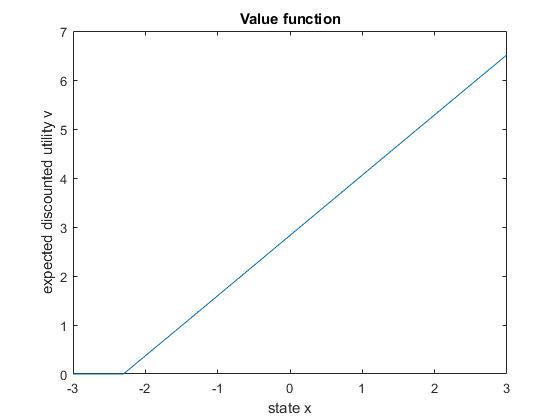

In [164]:
plot(suppX,v) % plot of value function
title("Value function")
xlabel("state x")
ylabel("expected discounted utility v")



a) **What would happen if uncertainty increases, i.e. the variance `sigma` increases. What if there would be no uncertainty? Briefly motivate your answer and modify and run the code to verify it numerically.**

if sigma increases the distribution is less concentrated, then the possible partners that a person can have are limited between -3 and 3, if sigma increases, the probability that there are people under 3 or greater than 3 increases and therefore, given that these people cannot be accessed the discounted utility is lower.

b) **Write the Bellman equation for $v$.**

Bellman equation: V(x)= max [$u(0,x_{t})+\beta$  $\sum_{i=1}$  $\Pi$  V(x')] , for all X where:   
$\beta$=0.9;  
u(x)= utility obtained in the present from the relationship;  
$\Pi$ = transition matrix;  
V (x ')= value function in the future: it represents the utility of the future. It depends on the decision take at time t=1 on whether to continue the relationship or not. Should the relationship be continued, than the $\beta$ discounts all the future utility obtained from the relationship. However, if the relationship is broken in the present, there is no utlity in the future (e.g. this is why we have "zeros(1,nSuppX)" in the code and why the need of a transition matrix which contains various probabilities of v). To sum it up, it captures the optimal behavior in the future discounted with factor $\beta$    
Equivalently, the bellman operator can be found below:

In [124]:
rho = 0.9;
bellman=@(v)(max([suppX+rho*(capPi*v)';zeros(1,nSuppX)])');

c) **Explicitly define this space of value functions, with the metric suggested by the code. Show that this metric indeed satisfies the three properties a metric should have (see the theory slides). Demonstrate that the resulting metric space is complete. Write the Bellman operator as a mapping from this space into itself.**

A metric space is a set u with a metric m: u*u -->R such that for any U,U',U'' \in u (S,p) is defined by:   

a) $m(U,U') = 0$ if and only if $U=U'$<br>
b) $m(U,U')$ =$m(U',U)$, and<br>
c) $m(U,U'')\leq m(U,U')+m(U',U'')$ (triangle inequality)<br>

Such as U is a simetric matrix that has a diagonal of zeros and in the rest of the matrix has the distance between the different points (1001) bounded in {-3,3}, it is true that $m(U,U') = 0$, $m(U,U')$ =$m(U',U)$<br> and $m(U,U'')\leq m(U,U')+m(U',U'')$
 
Demonstrate that the resulting metric space is complete
PROOF:
A Cauchy sequence in $(u,m)$ is a sequence ${U_{n}}$ in u such that for each $ε_x$ > 0, there $\exists$ N_εx such that $m(U_{n},U_{n}')$ < $ε_x$, for all $n ≥ N_εx$.  
This metric space (u,m) is complete if every Cauchy sequence in (u,m) converges to a point in u. 


#### Write the Bellman operator as a mapping from this space into itself.

$\psi$ : v  $\in$ R -> max u(x) + $\beta$  $\sum_{i=1}$  $\Pi$  V(x'), where  
$\psi$ (v)=v  
Thus, the Bellman equation can be written as operator on the complete space (R,m) of functions v, with sup/max metric m

d) **Using all this, prove that the Bellman equation has a unique solution $v$. (Hint: first show that the Bellman operator satisfies Blackwell's sufficient conditions for a contraction.)**

Let $v=\Phi(v)$<br>

With $\Phi:v$ $\in U$ : 

max  $\frac{b+$\rho v(0)}{1-p(1-\alpha)}$, $X_{t}$+ $\rho \epsilon E[v(X_{t+1}|X_{t}]$
Where U is a complete metric space. For v=$\Phi:v$ to have a unique solution, the sufficient conditions of blackwell need to hold monotonicity and discounting. 

Prove of Monotonicity
$\Phi:v$ $\leq$  $\Phi:v'$ with v $\leq$ v'
if v $\leq$ v then $E[v(X_{t+1}|X_{t}$ $\leq$ $E[v'(X_{t+1}|X_{t}$ because an expectation is a linear operator and in this case increasing. Such as only the expectation depends on v, it holds that  $\frac{b+$\rho v(0)}{1-p(1-\alpha)}$, $X_{t}$ + $\rho \epsilon E[v(X_{t+1}|X_{t}$ $\leq$ $\frac{b+$\rho v(0)}{1-p(1-\alpha)}$, $X_{t}$ + $\rho \epsilon E[v'(X_{t+1}|X_{t}]$ $

So $\Phi:v$ $\leq$ $\Phi:v'$ <br>
Prove Discounting: $\Phi(v+ \psi) \leq$ $\rho\Phi(v))$ with $\rho  \in (0,1) $<br>
$\Phi(v+ \psi)= max \frac{b+\rho v(0)}{1-p(1-\alpha)}$, $X_{t} + \rho \epsilon E[v(X_{t+1}+\rho\psi]= $<br>
max{ $\frac{b+\rho v(0)}{1-p(1-\alpha)}$, $X_{t}$ + $\rho\epsilon E[v(X_{t+1}+\rho\psi]$ $\leq$ max{ $\frac{b+\rho v(0)}{1-p(1-\alpha)}$, $X_{t}$ + $\rho\epsilon E[v(X_{t+1}|X_{t}+\rho\psi]$ = $\Phi(v)$ + $\rho$$\psi$
Thus $\Phi(v+ \psi)$ $\leq$ $\Phi(v)$+ $\rho$$\psi$ with $\rho$ $\in$ (0,1)

Therefore, as these two conditions hold $\Phi(v)$ is a contraction with modulus $\rho$ and thus has a unique fixed point  
 





e) **In the code, we use value function iteration to find the fixed point $v$. What are the convergence properties of this algorithm? How could you adapt it to ensure convergence in fewer iterations?**

$\rho$ is a value between 0 and 1 because otherwise it will explode. 
If the target is to ensure convergence in fewer iterations $\rho$ must be closer to zero, it means that we give more importance to the present that to the future utility. On the contrary, if $\rho$ is close to 1, the function converge slowly due to the weight we give to the future utility.  

f) **Prove that the value function is weakly increasing. (Hint: Apply the contraction mapping theorem twice, first on the space of all value functions and then to the space of all weakly increasing value functions.)** 

The fact that the value function is weakly increasing comes from the monotonicity of policy iteration:
The sequence of value functions generated by policy iteration satisfies ν0 ≤ ν1 ≤ ν2.
To show this, choose a random n ≥ 1. It is also important to point out that optimal value (v(x)) is a fixed point of   
$\psi^\alpha$ : v  $\in$ R -> max u(x) + $\beta$  $\sum_{i=1}$  $\Pi$  V(x') such that $\psi^\alpha_n $ $(v_n-_1)$ =  $\psi$ ($V_n-_1)$ ≥ $\psi^\alpha_n-_1 $ $(v_n-_1)$= $(v_n-_1)$  

As $\psi^\alpha_n $ is is a monotone contraction on U (meaning that it Blackwell’s sufficient conditions), this implies that the sequence  $(v_n-_1)$  , $\psi^\alpha_n $ $(v_n-_1)$, $\psi^\alpha_n $($\psi^\alpha_n $ $(v_n-_1)$)..increases towards the unique fixed point $v^\alpha_n $ of $\psi^\alpha_n $ so that $v_n$= $v^\alpha_n $  ≥ $(v_n-_1)$

Moreover, since it is possible to initialize iterations with a weakly increasing function, the value function itself has to be weakly increasing if we consider this scenario in the limit. However, as weakly increasing functions are defined  usually by 
weak inequalities, (e.g. h (a) ≥ h (b)) if a ≥ b, then this would mean that the set of such  functions is closed and thus,  holds in the limit. Therefore, the value function is weakly increasing. 

g) **Give an expression for the value of continuing if the state is $x$. Show that this value is strictly increasing in $x$. Conclude that this implies that the optimal stopping rule has the above threshold property.**

Considering that the state is x, the value of continuing can be analyzed via Bellman's equation: V(x)= max [u(x) + $\beta$  $\sum_{i=1}$  $\Pi$  V(x')]. The current utlity obtained from the relationship is defined by u(x) but for taking a decision at the moment, we have to discount the future utlity as well. If it turns out that the utility is negative  thus  < 0 (which is the utility obtained by breaking the relationship), it is better to end the relationship. Thus continue the relationhip if v(x) >0, while v(x) is defined as before (via Bellman's equation).  

This value is strictly increasing in x.  
### For proving this, let  y>x.  
#### $\psi$ (v) (x)= max [u(x) + $\beta$  $\sum_{i=1}$  $\Pi$  V(x')] (1)   
#### ≤ max [u(x) + $\beta$  $\sum_{i=1}$  $\Pi$  V(x')] (2)   
where for (1) x $\in$ to the space value of x while in (2) x belongs to the space value of y =>     
####  < max [u(y) + $\beta$  $\sum_{i=1}$  $\Pi$  V(y')]= $\psi$ (v) (y)   
 #### Thus,  $\psi$ maps any continous (bounded) function into a strictly increasing function (assuming that u(x) is strictly increasing in x in the first place, and that if x ≤ y, then the space value of  x belongs to the space value of y

Analyzing the problem of breaking or not the relationship it can be regarded as an optimal stopping problem. In such problems the focus is on the timing of a single event: in our case, when to end the relationship. The treshold used in this problem emphasizes this aspect:in the code it uses  vOld = v for max(abs(v-vOld)))>1E-9 and v = bellman(vOld) for dist = [dist;max(max(abs(v-vOld)))]
